[0.07193083 0.41481755 0.35723551]


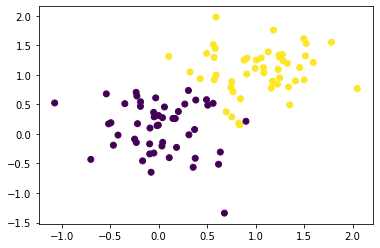

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, n_features = 2, centers = [[0,0], [1,1]], cluster_std = [.4,.4])

plt.scatter(X[:,0], X[:,1], c = y)
plt.show

num_samples = X.shape[0]

#Learn the discriminant through the normal equations

sample_matrix = np.hstack((np.ones((num_samples,1)), X))

RHS = np.dot(sample_matrix.T, y)
normal_matrix = np.dot(sample_matrix.T, sample_matrix)

beta = np.linalg.solve(normal_matrix, RHS)
print(beta)

#beta = (XT*X)^{-1}*{X^t t}

#ridge classifier from scikit learn

#plot the classification boundary

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0]
[[ 1.         -1.073245   -1.073245  ]
 [ 1.         -1.04170428 -1.073245  ]
 [ 1.         -1.01016355 -1.073245  ]
 ...
 [ 1.          1.98620507  2.04928652]
 [ 1.          2.0177458   2.04928652]
 [ 1.          2.04928652  2.04928652]]
[0. 0. 0. ... 1. 1. 1.]


<function matplotlib.pyplot.show(*args, **kw)>

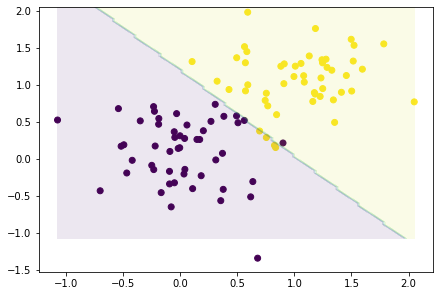

In [26]:
print(y)

x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])

x2min = np.amin(X[:,0])
x2max = np.amax(X[:,0])

x1mesh = np.linspace(x1min, x1max, 100)
x2mesh = np.linspace(x2min, x2max, 100)

x1MeshMat, x2MeshMat = np.meshgrid(x1mesh.reshape(-1,1), x2mesh.reshape(-1,1))

x1MeshMat = x1MeshMat.flatten()
x2MeshMat = x2MeshMat.flatten()

X12 = np.vstack((x1MeshMat, x2MeshMat)).T

totalNumPointsGrid = len(x1MeshMat)

# generating the additional vector of ones
addon = np.ones((totalNumPointsGrid, 1))

#stack it to the matrix of prototypes coordinates
pointsGrid = np.hstack((addon.reshape(-1,1), X12))
print(pointsGrid)

#Green expression on the board (multiplication of weight vector with the sample matrix)

prediction = np.dot(pointsGrid,beta)

#reorganize my targets (according to original values given)

prediction[prediction<.5] = 0
prediction[prediction>.5] = 1

print(prediction)

#from what I predicted, reshape vectors as matrices

coordinatesX1 = np.reshape(x1MeshMat, (100,100))
coordinatesX2 = np.reshape(x2MeshMat, (100,100))
reshaped_prediction = np.reshape(prediction, (100,100))

fig, ax = plt.subplots(constrained_layout = True)
plt.scatter(X[:,0], X[:,1], c = y)
ax.contourf(coordinatesX1, coordinatesX2, reshaped_prediction, alpha = 0.1)
plt.show


In [ ]:
#multiple dimensions

#OLS classifier

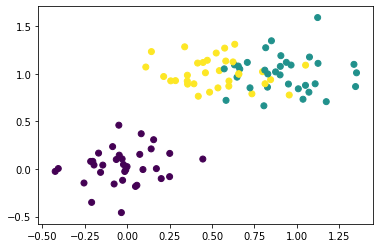

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, t = make_blobs(n_samples = 100, n_features = 2, centers = [[0,0], [1,1], [.5,1]], cluster_std = [.2,.2,.2])

plt.scatter(X[:,0], X[:,1], c = t)
plt.show

#convert the y vector into a binary matrix
#stack the X in a matrix
#learn the classifier through the Normal equations
#generate the meshgrid and predict the target vectors for each grid point

K = 3
numSamplePoints = X.shape[0]

targetMatrix = np.zeros((K, numSamplePoints))
for i in np.arange(0, numSamplePoints):
    
    targetMatrix[t[i],i] = 1
    
X12 = X
vec_ones = np.ones((numSamplePoints, 1))
pMat = np.hstack((X12, vec_ones))

pMat_times_T = np.dot(pMat.T, targetMatrix.T)

beta = np.dot(np.linalg.inv(np.dot(pMat.T,pMat)), pMat_times_T)

x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])
x2min = np.amin(X[:,1])
x2max = np.amax(X[:,1])
x3min = np.amin(X[:,2])
x3max = np.amax(X[:,2])

x1mesh = np.linspace(x1min, x1max, 100)
x2mesh = np.linspace(x2min, x2max, 100)



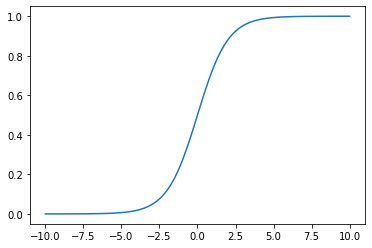

In [36]:
x = np.linspace(-10,10,100)

sigmoid = np.true_divide(1,1+np.exp(-x))
plt.plot(x,sigmoid)
plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

heart_dataset = pd.read_csv('framingham.csv')
heart_dataF = pd.DataFrame(heart_dataset)

heart_dataset('male')